In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
df = pd.read_csv("/content/winequality-red (1) (1).csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'] -= 3

In [ ]:
X = df.drop('quality', axis=1)
y = pd.Categorical(df['quality'])
y = pd.get_dummies(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(y.shape[1], activation='softmax')
])


In [ ]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
40/40 [==============================] - 2s 10ms/step - loss: 1.7039 - accuracy: 0.4199 - val_loss: 1.2538 - val_accuracy: 0.4375
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 1.1984 - accuracy: 0.4863 - val_loss: 1.2041 - val_accuracy: 0.5031
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.1584 - accuracy: 0.4973 - val_loss: 1.1941 - val_accuracy: 0.4969
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 1.1530 - accuracy: 0.4910 - val_loss: 1.2146 - val_accuracy: 0.4656
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 1.1544 - accuracy: 0.4973 - val_loss: 1.2032 - val_accuracy: 0.4938
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 1.1271 - accuracy: 0.5035 - val_loss: 1.1869 - val_accuracy: 0.4875
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 1.1299 - accuracy: 0.5106 - val_loss: 1.1856 - val_accuracy: 0.4938
Epoch 8/10
40/40 [=

In [ ]:
import matplotlib.pyplot as plt

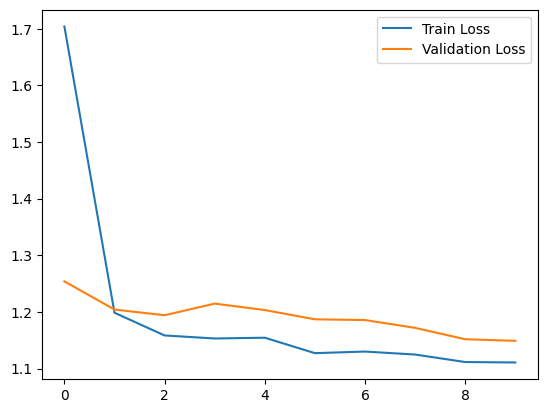

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

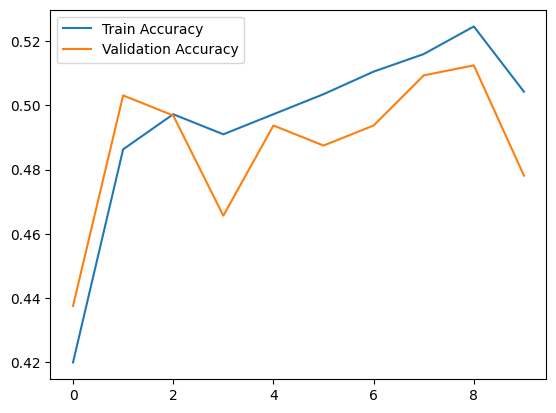

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model_loss, model_acc = model.evaluate(X_test, y_test)
print("Test Loss:", model_loss)
print("Test Accuracy:", model_acc)


10/10 [==============================] - 0s 3ms/step - loss: 1.1489 - accuracy: 0.4781
Test Loss: 1.1488608121871948
Test Accuracy: 0.4781250059604645


In [ ]:
predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = np.argmax(predictions, axis=1)
print(confusion_matrix(y_test.values.argmax(axis=1), y_pred)) # extract the labels from y_test
print(classification_report(y_test.values.argmax(axis=1), y_pred, zero_division=1))

[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 77 55  0  0]
 [ 0  0 11 31  0  0]
 [ 0  0  1  4  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00        10
           2       0.50      0.75      0.60       130
           3       0.44      0.42      0.43       132
           4       1.00      0.00      0.00        42
           5       1.00      0.00      0.00         5

    accuracy                           0.48       320
   macro avg       0.82      0.20      0.17       320
weighted avg       0.57      0.48      0.42       320

